<a href="https://colab.research.google.com/github/Ruqyai/Tuwaiq_Academy/blob/main/Jupyter/Colab/Final_Project_on_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project on Colab

#Step 1: Download the code

In [1]:
!wget https://dlcdn.apache.org/kafka/3.3.1/kafka_2.13-3.3.1.tgz
!tar -xzf kafka_2.13-3.3.1.tgz


--2022-10-13 12:00:14--  https://dlcdn.apache.org/kafka/3.3.1/kafka_2.13-3.3.1.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105053134 (100M) [application/x-gzip]
Saving to: ‘kafka_2.13-3.3.1.tgz’

kafka_2.13-3.3.1.tg 100%[===================>] 100.19M   266MB/s    in 0.4s    

2022-10-13 12:00:14 (266 MB/s) - ‘kafka_2.13-3.3.1.tgz’ saved [105053134/105053134]



In [2]:
%cd kafka_2.13-3.3.1

/content/kafka_2.13-3.3.1


In [3]:
!ls bin

connect-distributed.sh	      kafka-mirror-maker.sh
connect-mirror-maker.sh       kafka-producer-perf-test.sh
connect-standalone.sh	      kafka-reassign-partitions.sh
kafka-acls.sh		      kafka-replica-verification.sh
kafka-broker-api-versions.sh  kafka-run-class.sh
kafka-cluster.sh	      kafka-server-start.sh
kafka-configs.sh	      kafka-server-stop.sh
kafka-console-consumer.sh     kafka-storage.sh
kafka-console-producer.sh     kafka-streams-application-reset.sh
kafka-consumer-groups.sh      kafka-topics.sh
kafka-consumer-perf-test.sh   kafka-transactions.sh
kafka-delegation-tokens.sh    kafka-verifiable-consumer.sh
kafka-delete-records.sh       kafka-verifiable-producer.sh
kafka-dump-log.sh	      trogdor.sh
kafka-features.sh	      windows
kafka-get-offsets.sh	      zookeeper-security-migration.sh
kafka-leader-election.sh      zookeeper-server-start.sh
kafka-log-dirs.sh	      zookeeper-server-stop.sh
kafka-metadata-quorum.sh      zookeeper-shell.sh
kafka-metadata-shell.sh


## Step 2: Start the Kafka server

In [4]:
!bin/zookeeper-server-start.sh -daemon config/zookeeper.properties

In [5]:
!bin/kafka-server-start.sh -daemon config/server.properties

## Step 3: Prepare input topic and start Kafka producer

In [6]:
!bin/kafka-topics.sh --create \
    --bootstrap-server localhost:9092 \
    --replication-factor 1 \
    --partitions 1 \
    --topic Tuwaiq

Created topic Tuwaiq.


#### Check if the topic exist

In [8]:
#!bin/kafka-topics.sh --bootstrap-server localhost:9092 --describe

In [7]:
!bin/kafka-topics.sh --list --bootstrap-server localhost:9092

Tuwaiq


## Step 4: Start send and receive messages

In [8]:
#!bin/kafka-console-producer.sh --bootstrap-server localhost:9092 --topic Tuwaiq


In [9]:
#!bin/kafka-console-consumer.sh --topic Tuwaiq --from-beginning --bootstrap-server localhost:9092

## Use kafka-python

In [10]:
!pip install kafka-python &> /dev/null

In [11]:
!wget https://raw.githubusercontent.com/Ruqyai/Tuwaiq_Academy/main/app/producer.py &> /dev/null

In [12]:
#@title Warning : localhost
from IPython.display import HTML
from google.colab.output import _publish as publish
publish.css("b {color: red} #loc {color: blue}")
HTML("<b>Warning:</b> Before go to next step, edit the host in <b id=loc>producer.py file</b> to <b id=loc>localhost</b>")

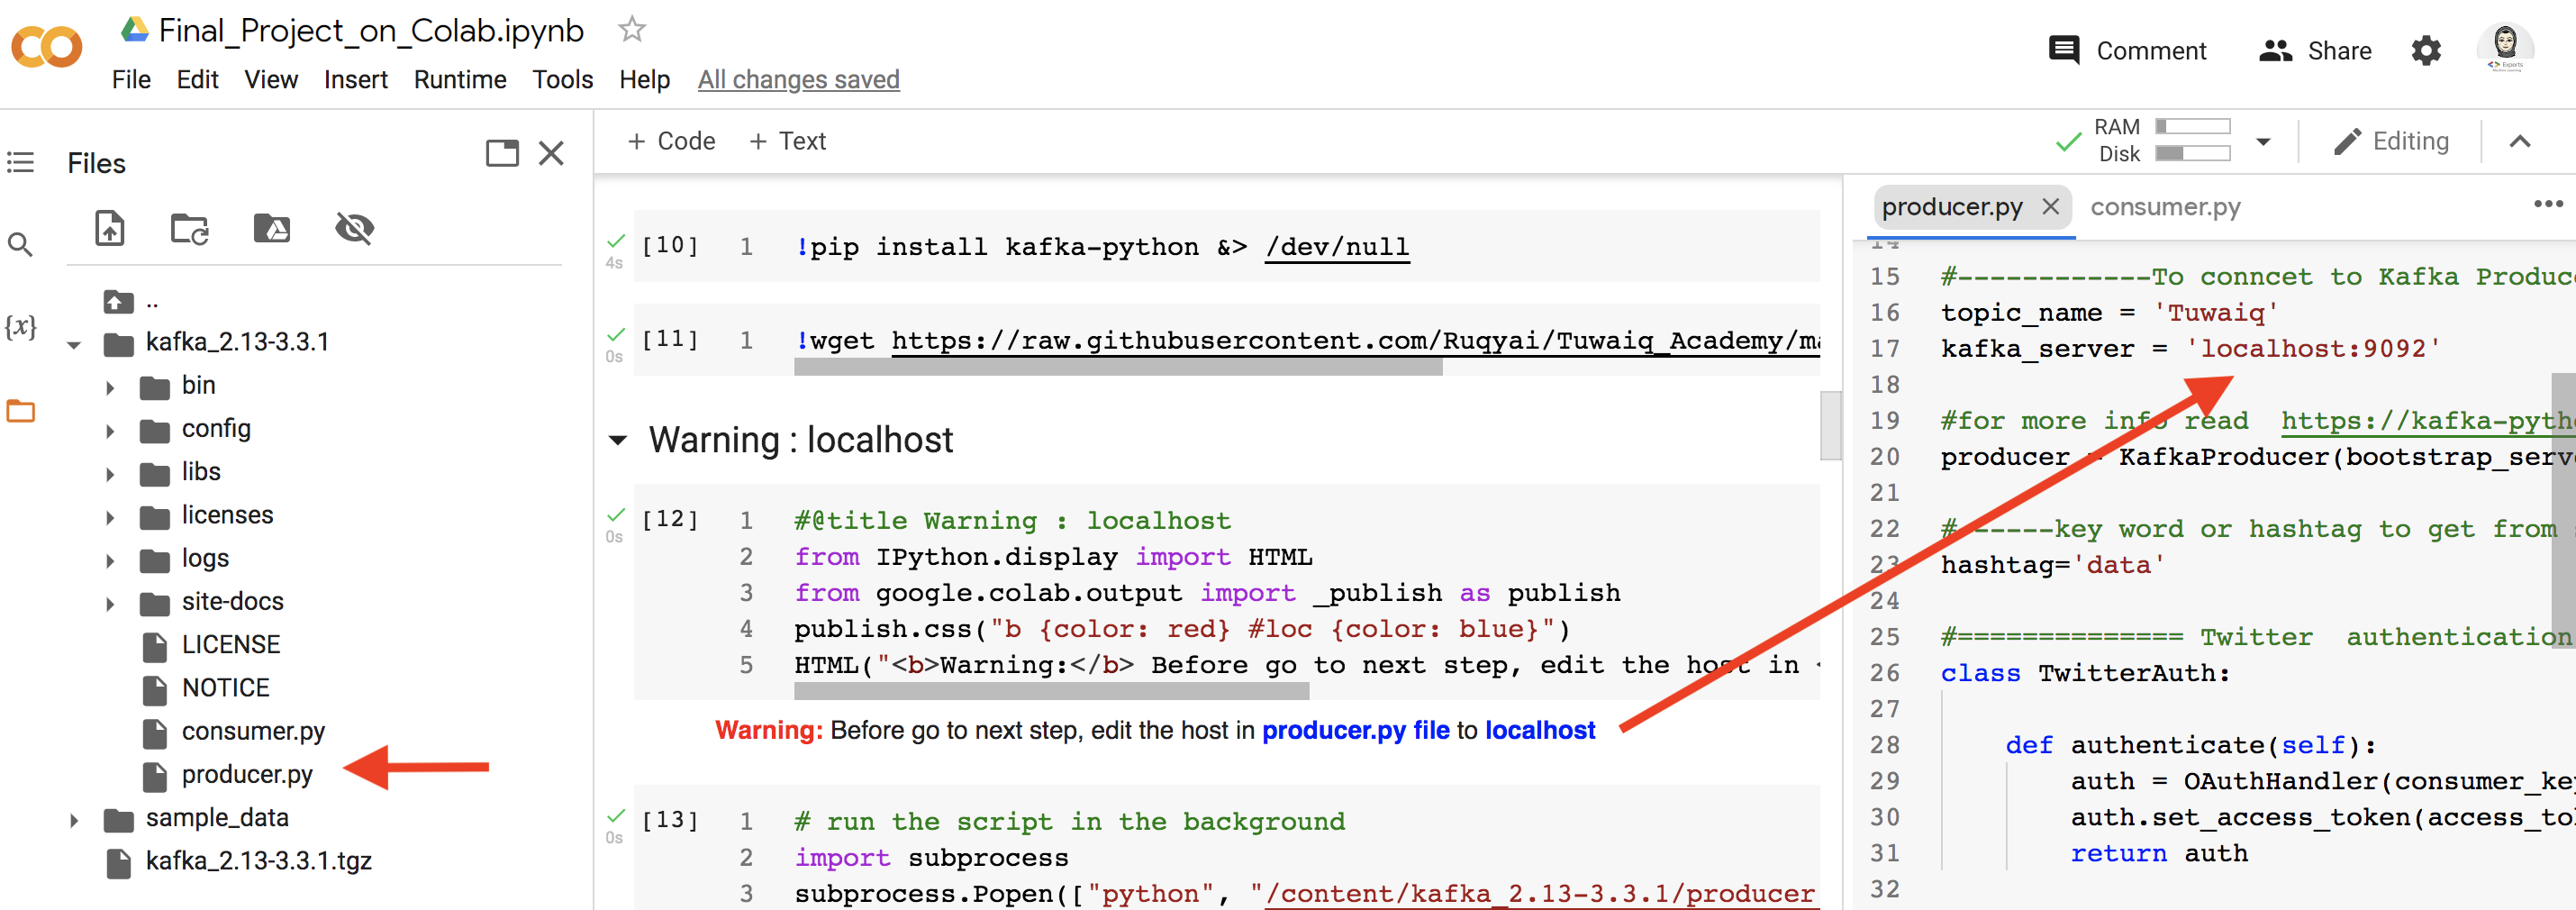

In [13]:
# run the script in the background
import subprocess
subprocess.Popen(["python", "/content/kafka_2.13-3.3.1/producer.py"]) 


In [16]:
#!bin/kafka-console-consumer.sh --topic Tuwaiq --bootstrap-server localhost:9092

In [14]:
!apt install mongodb &> /dev/null
 
#Local Server Need Not be started for Remote Operations
!service mongodb start

 * Starting database mongodb
   ...done.


In [15]:
!wget https://raw.githubusercontent.com/Ruqyai/Tuwaiq_Academy/main/app/consumer.py &> /dev/null

In [19]:
#@title Warning : localhost
from IPython.display import HTML
from google.colab.output import _publish as publish
publish.css("b {color: red} #loc {color: blue}")
HTML("<b>Warning:</b> Before go to next step, edit the host in <b id=loc>consumer.py file</b> to <b id=loc>localhost</b>")

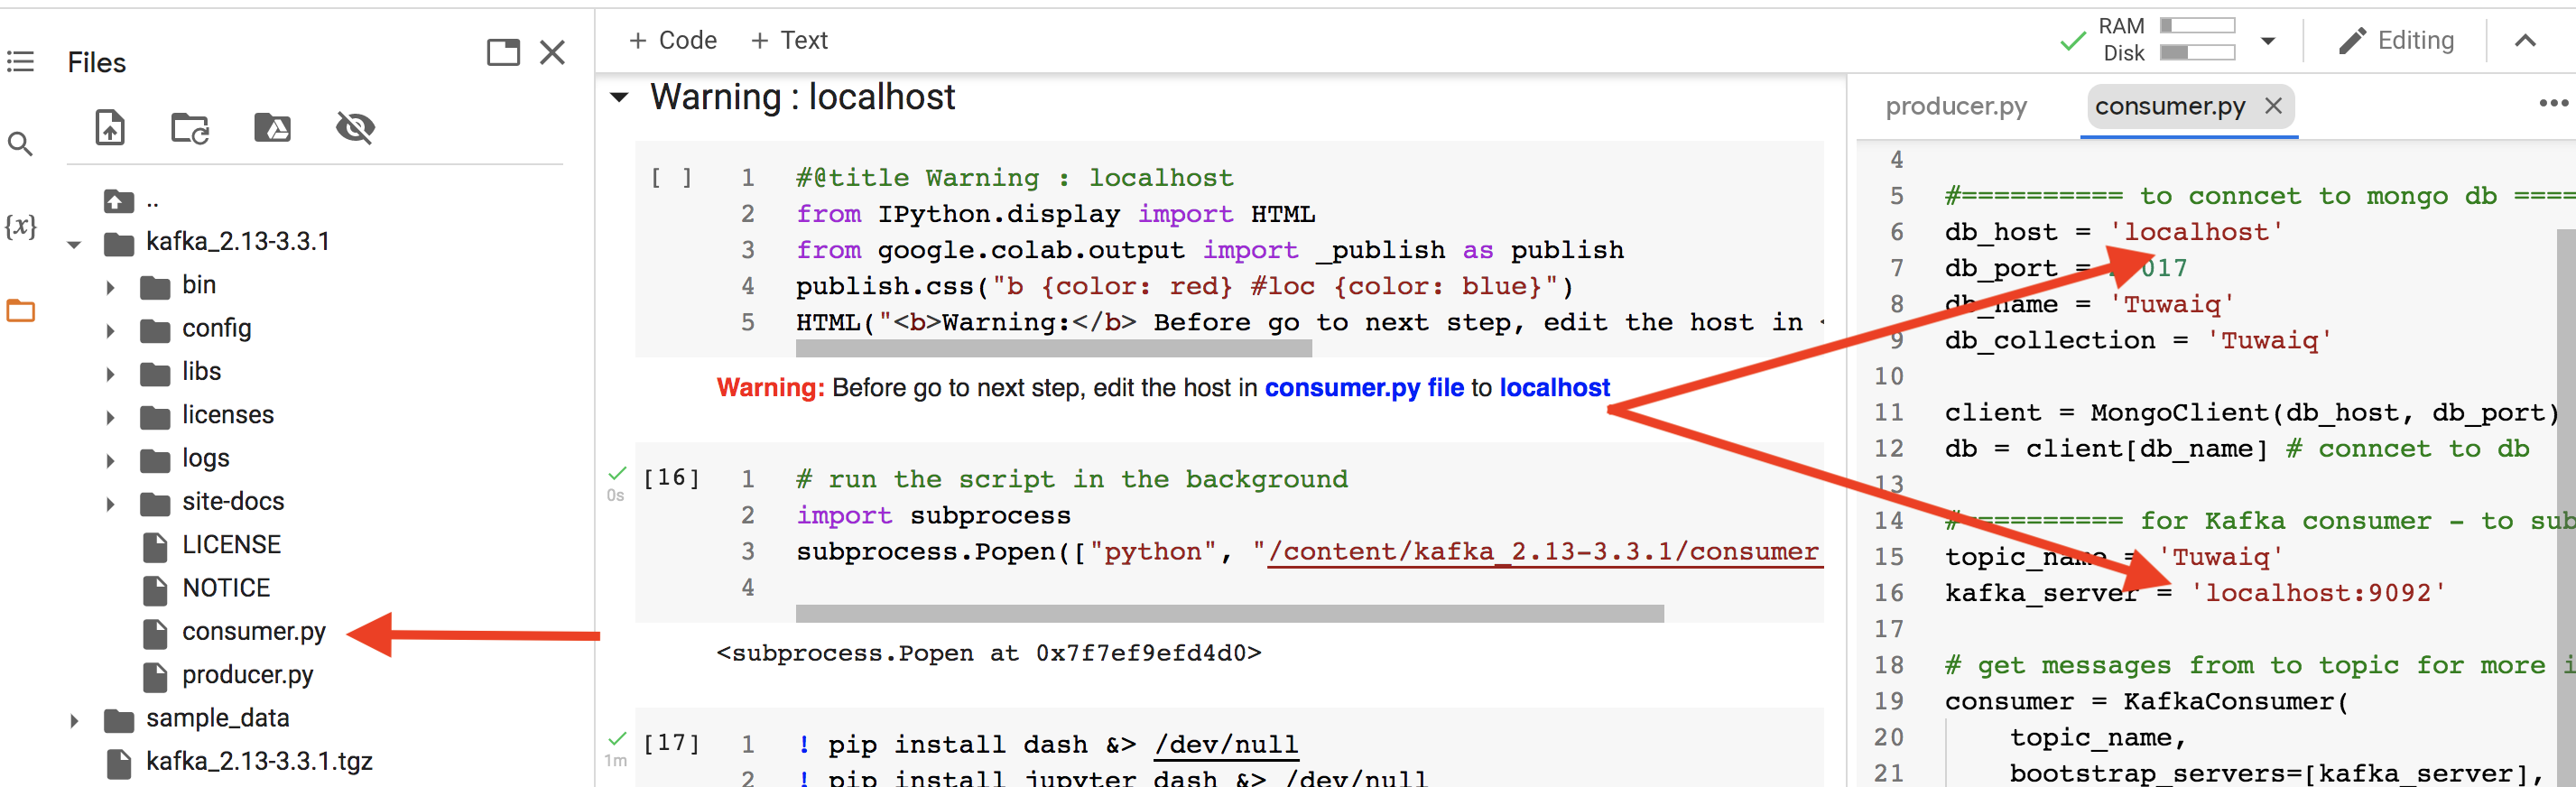

In [16]:
# run the script in the background
import subprocess
subprocess.Popen(["python", "/content/kafka_2.13-3.3.1/consumer.py"]) 


In [17]:
! pip install dash &> /dev/null
! pip install jupyter_dash &> /dev/null
! pip install --upgrade plotly &> /dev/null
#! pip install Flask &> /dev/null
! pip install dash-bootstrap-components &> /dev/null
! pip install dash-core-components &> /dev/null
! pip install dash-html-components &> /dev/null
#! pip install celery &> /dev/null

In [ ]:
from pymongo import MongoClient
#import flask
#import dash
from jupyter_dash import JupyterDash 
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import datetime
import itertools
import math
import re
nltk.download('punkt')
nltk.download('stopwords')

In [20]:

#========== to conncet to mongodb to show data in a dashboard========
db_host = 'localhost'
db_port = 27017
db_name = 'Tuwaiq'
db_collection = 'Tuwaiq'

#---- colors--------
START_COLOR = '#FEFEFE'
POSITIVE_COLOR = '#00ff00'
NEGATIVE_COLOR = '#fc0303'
NEUTRAL_COLOR = '#e98d2e'

dash_app = JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
dash_app.title = 'donald-track'

server = dash_app.server

##########################################
#       The layout
##########################################
# doc https://dash.plotly.com/dash-core-components

dash_app.layout = html.Div(children=[
    # Header
    html.Header(
        children=[

            html.H1(
                'Dashboard'
            ),
            html.H3(
                'Tracker tweets in real-time for a certain hashtag'
            )
        ],
        style=dict(padding='25px', textAlign='center')
    ),

    # Graphs
    html.Div(id='top-section'),
    html.Div(id='bottom-section'),

    # Footer
    html.Footer(
        className='text-lg-start bg-light text-muted',
        children=[
            html.Section(
                children=[

                    html.H6(
                        'Created for Data Engineering Course in Tuwaiq Academy'
                    )

                ]
            )
        ], style=dict(padding='25px', textAlign='center')
    ),

    # Update the data evey 2 sec for more info read https://dash.plotly.com/dash-core-components/interval
    dcc.Interval(
        id='interval-component-fast',
        interval=2000, # milliseconds 
        n_intervals=0 # Number of times the interval has passed
    )
])

##########################################
#       fill out the layout
##########################################
# for more info read https://dash.plotly.com/advanced-callbacks

@dash_app.callback(Output('top-section', 'children'),
                   [Input('interval-component-fast', 'n_intervals')])
def update_top_section_live(n):
    # Loading data from MongoDB
    client = MongoClient(db_host, db_port)
    db = client[db_name]
    df = pd.DataFrame(list(db[db_collection].find()))

    # Convert string to datetime
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['user_created_at'] = pd.to_datetime(df['user_created_at'])

    # Clean and transform data to enable time series
    result = df.groupby([pd.Grouper(key='created_at', freq='5s'), 'polarity']) \
        .count().unstack(fill_value=0).stack().reset_index()
    result = result.rename(columns={"_id": "number_of_tweets"})
    time_series = result["created_at"][result['polarity'] == 0].reset_index(drop=True) # x

    min30 = datetime.datetime.utcnow() - datetime.timedelta(minutes=30)

    neutral_num = result[result['created_at'] > min30]["number_of_tweets"][result['polarity'] == 0].sum() #y
    negative_num = result[result['created_at'] > min30]["number_of_tweets"][result['polarity'] == -1].sum() #y
    positive_num = result[result['created_at'] > min30]["number_of_tweets"][result['polarity'] == 1].sum() #y

    # Create the graph
    children = [
        html.Div(
            className='container-fluid',
            children=[
                html.Div(
                    className='row',
                    children=[
                        html.Div(
                            className='col-md-8 col-lg-8 col-xl-8 mx-auto',
                            children=[
                                # Line Chart
                                html.Div([
                                    dcc.Graph(id='line-chart', figure={'data': [
                                        go.Scatter(x=time_series,
                                                   y=result["number_of_tweets"][result['polarity'] == 0].reset_index( drop=True),
                                                   name="Neutrals",
                                                   opacity=0.8,
                                                   mode='lines',
                                                   line=dict(width=0.5, color=NEUTRAL_COLOR),
                                                   stackgroup='one'),

                                        go.Scatter(x=time_series,
                                                   y=result["number_of_tweets"][result['polarity'] == -1].reset_index( drop=True).apply(lambda x: -x),
                                                   name="Negatives",
                                                   opacity=0.8,
                                                   mode='lines',
                                                   line=dict( width=0.5, color=NEGATIVE_COLOR),
                                                   stackgroup='two' ),
                                        go.Scatter(x=time_series,
                                                   y=result["number_of_tweets"][result['polarity'] == 1].reset_index(drop=True),
                                                   name="Positives",
                                                   opacity=0.8,
                                                   mode='lines',
                                                   line=dict(width=0.5, color=POSITIVE_COLOR),
                                                   stackgroup='three')
                                    ],
                                        'layout': {
                                        'title': 'Using sentiment analysis to show User opinions'
                                    }
                                    }
                                    )
                                ])
                            ]
                        ),
                        html.Div(
                            className='col-md-4 col-lg-4 col-xl-4 mx-auto',
                            children=[

                                # Pie Chart
                                html.Div([
                                    dcc.Graph(id='pie-chart', figure={'data': [
                                            go.Pie(labels=['Positives', 'Negatives', 'Neutrals'],
                                               values=[positive_num, negative_num, neutral_num],
                                               name="View Metrics",
                                               opacity=0.7,
                                               marker_colors=[POSITIVE_COLOR, NEGATIVE_COLOR, NEUTRAL_COLOR],
                                               textinfo='value',
                                               hole=0.65)],
                                        'layout': {'showlegend': False, 'title': 'Positive VS. negative Vs. neutral tweets in last 30 minutes', 'annotations': [
                                            dict(text='{0:.1f}K'.format((positive_num + negative_num + neutral_num) / 1000),
                                            font=dict(size=40), showarrow=False)]
                                            }
                                        }
                                    )
                                ])
                            ]
                        )
                    ]
                )
            ]
        )
    ]
    return children

# ===============================bottom-section==================

@dash_app.callback(Output('bottom-section', 'children'), 
                [Input('interval-component-fast', 'n_intervals')])

def update_bottom_section_live(n):
    # Loading data from MongoDB
    client = MongoClient(db_host, db_port)
    db = client[db_name]
    df = pd.DataFrame(list(db[db_collection].find()))

    # Convert string to datetime
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['user_created_at'] = pd.to_datetime(df['user_created_at'])

    # Clean and transform data to enable word frequency
    content = ' '.join(df['text']) # tweets text
    content = re.sub(r'http\S+', '', content)
    content = content.replace('RT ', ' ').replace('&amp;', 'and')
    content = re.sub('[^A-Za-z0-9]+', ' ', content)
    content = content.lower()
    tokenized_word = word_tokenize(content)
    stop_words = set(stopwords.words('english'))
    filtered_sent = [] #--------------to count frequency words in the tweets to be top related topics 
    for w in tokenized_word:
        if (w not in stop_words) and (len(w) >= 3):
            filtered_sent.append(w)
    fdist = FreqDist(filtered_sent) # https://www.educative.io/answers/what-is-freqdist-in-python

    fd = pd.DataFrame(fdist.most_common(16), columns=['word', 'frequency']).drop([0]).reindex() # df
    fd['polarity'] = fd['word'].apply(lambda x: TextBlob(x).sentiment.polarity) # sentiment analysis
    fd['marker_color'] = fd['polarity'].apply(lambda x: NEGATIVE_COLOR if x < -0.1 else (POSITIVE_COLOR if x > 0.1 else NEUTRAL_COLOR))
    fd['line_color'] = fd['polarity'].apply(lambda x: NEGATIVE_COLOR if x < -0.1 else (POSITIVE_COLOR if x > 0.1 else NEUTRAL_COLOR))

    # Create the graph
    children = [
        html.Div(
            className='container-fluid',
            children=[
                html.Div(
                    className='row',
                    children=[
                        html.Div(
                            className='col',
                            children=[
                                # Bar Chart
                                dcc.Graph(id='bar-chart', figure={'data': [
                                            go.Bar(x=fd["frequency"].loc[::-1],
                                                y=fd["word"].loc[::-1],
                                                name="Neutrals",
                                                orientation='h',
                                                marker_color=fd['marker_color'].loc[::-1],
                                                marker=dict(line=dict(color=fd['line_color'].loc[::-1], width=1),),
                                                opacity=0.7
                                            )
                                        ],
                                        'layout': {'title': 'Top words related the hashtag in tweets','hovermode': 'closest' }
                                    }
                                )
                            ]
                        ),
                    ]
                )
            ]
        )
    ]

    return children

if __name__ == '__main__':
    dash_app.run_server()

Dash app running on:


<IPython.core.display.Javascript object>

In [21]:
# stop running the script in the background
# p = subprocess.Popen('cmd', stdout=subprocess.PIPE, shell=True)
# p.kill()